<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**- **Exploratory Data Analysis (EDA) on Retail Sales Data**

---



## **Data Loading and Cleaning:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the retail sales dataset
data = pd.read_csv('/content/online_retail_sales_data.csv')
print(data)

# Check for missing values
missing_data = data.isnull().sum()
print(f"Missing Data:\n{missing_data}")




         index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity      InvoiceDate  UnitPrice  CustomerID         Country  
0              6   12/1/

# **Handling missing values**

In [ ]:
# Fill missing 'Description' with a placeholder
data['Description'].fillna('No Description', inplace=True)
# Drop rows where 'CustomerID' is missing
data.dropna(subset=['CustomerID'], inplace=True)

# Check the result
print(data['CustomerID'].isnull().sum())
# Check the result
print(data['Description'].isnull().sum())
print("\nData after cleaning:",data.head())
print(data.isnull().sum())


0
0

Data after cleaning:    index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country  

<ipython-input-26-fa6512d38df7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description'].fillna('No Description', inplace=True)


# **Descriptive Statistics**

In [ ]:
# Mean
mean_values = dataset_1[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mean()
print(f"Mean Values:\n{mean_values}")

# Median
median_values = dataset_1[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].median()
print(f"Median Values:\n{median_values}")

# Mode (for categorical columns like 'Gender', 'Product Category', and 'Customer ID')
mode_values = dataset_1[['Gender', 'Product Category']].mode()
print(f"Mode Values:\n{mode_values}")

# Standard Deviation
std_dev_values = dataset_1[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].std()
print(f"Standard Deviation:\n{std_dev_values}")

Mean Values:
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median Values:
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode Values:
   Gender Product Category
0  Female         Clothing
Standard Deviation:
Age                13.681430
Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


# **Time Series Analysis:**


<ipython-input-31-fb672d61f4c1>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


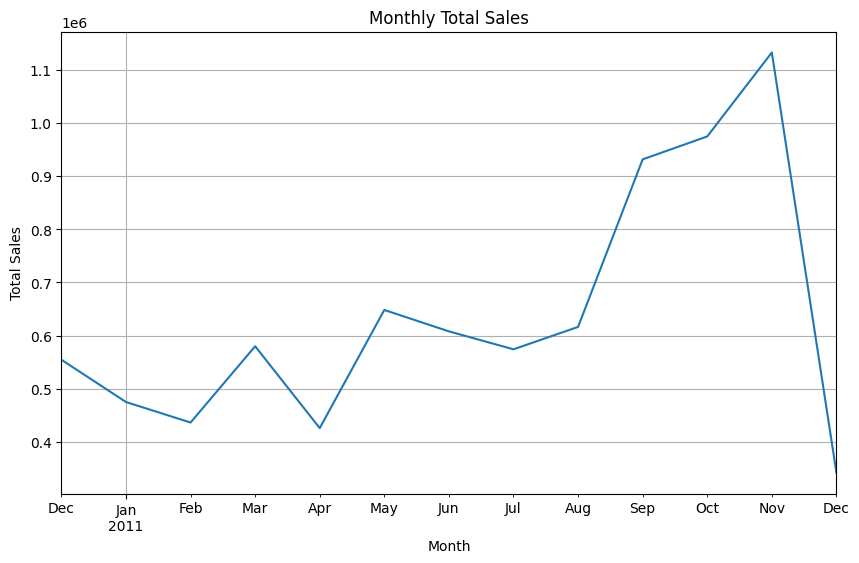


ADF Statistic: -2.091144783466657
p-value: 0.24809020480084387
The time series is likely non-stationary.


In [ ]:

# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create 'TotalSales' column (Quantity * UnitPrice)
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Resample the data by month and aggregate total sales
monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()

# Visualize the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


#Stationarity check using ADF test (Augmented Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the monthly sales data
result = adfuller(monthly_sales.dropna())  # Drop missing values for the test

# Check the result of the ADF test
print('\nADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation of the result
if result[1] < 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")


# **Customer and Product Analysis:**


---





### **1. Frequency of Purchases per Customer**


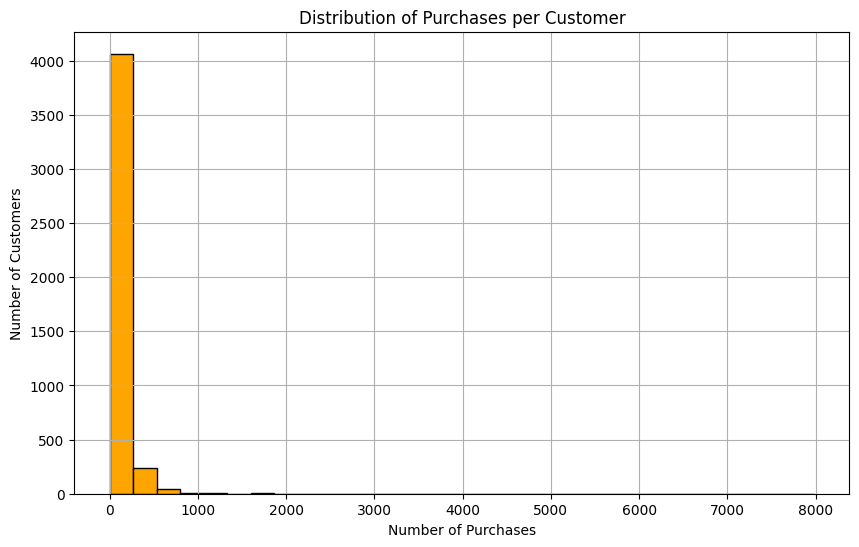

In [ ]:
# Frequency of purchases per customer
customer_purchase_frequency = data.groupby('CustomerID').size()

# Plot the distribution of purchase frequency
plt.figure(figsize=(10, 6))
customer_purchase_frequency.plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()



## **2. Total Spending by Customer**




   Quantity  UnitPrice  TotalAmount
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


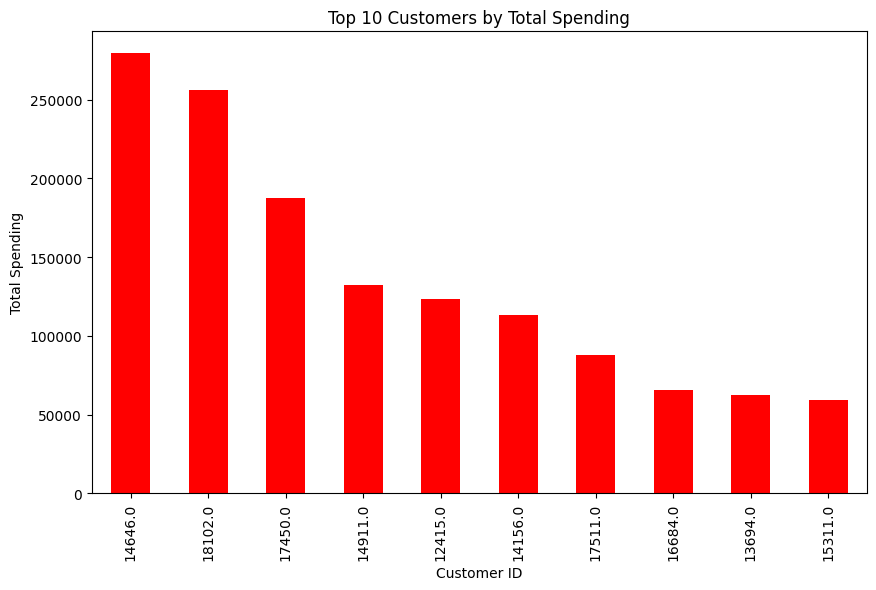

In [ ]:
# Ensure 'Quantity' and 'UnitPrice' are numeric
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Create the 'TotalAmount' column by multiplying 'Quantity' and 'UnitPrice'
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

# Verify the 'TotalAmount' column is created
print(data[['Quantity', 'UnitPrice', 'TotalAmount']].head())

# Total spending by customer
customer_total_spending = data.groupby('CustomerID')['TotalAmount'].sum()

# Display the top 10 customers by total spending
top_spenders = customer_total_spending.sort_values(ascending=False).head(10)

# Plot top spenders
top_spenders.plot(kind='bar', color='red', figsize=(10, 6))
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

## **3. Most Frequently Purchased Products**

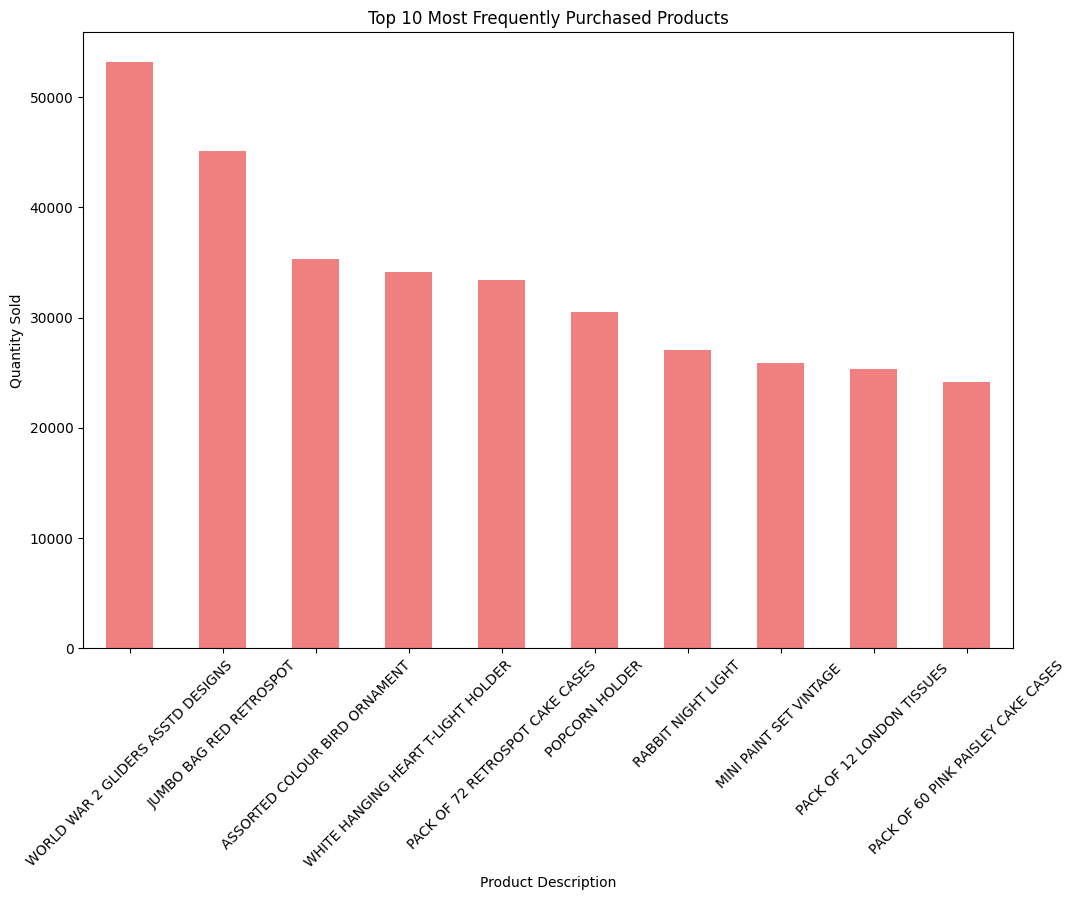

In [ ]:
# Total quantity sold by product description
product_quantity = data.groupby('Description')['Quantity'].sum()

# Plot the top 10 most frequently purchased products
top_quantity_products = product_quantity.sort_values(ascending=False).head(10)
top_quantity_products.plot(kind='bar', figsize=(12, 8), color='lightcoral')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


## **4. Geographic Analysis by Country**

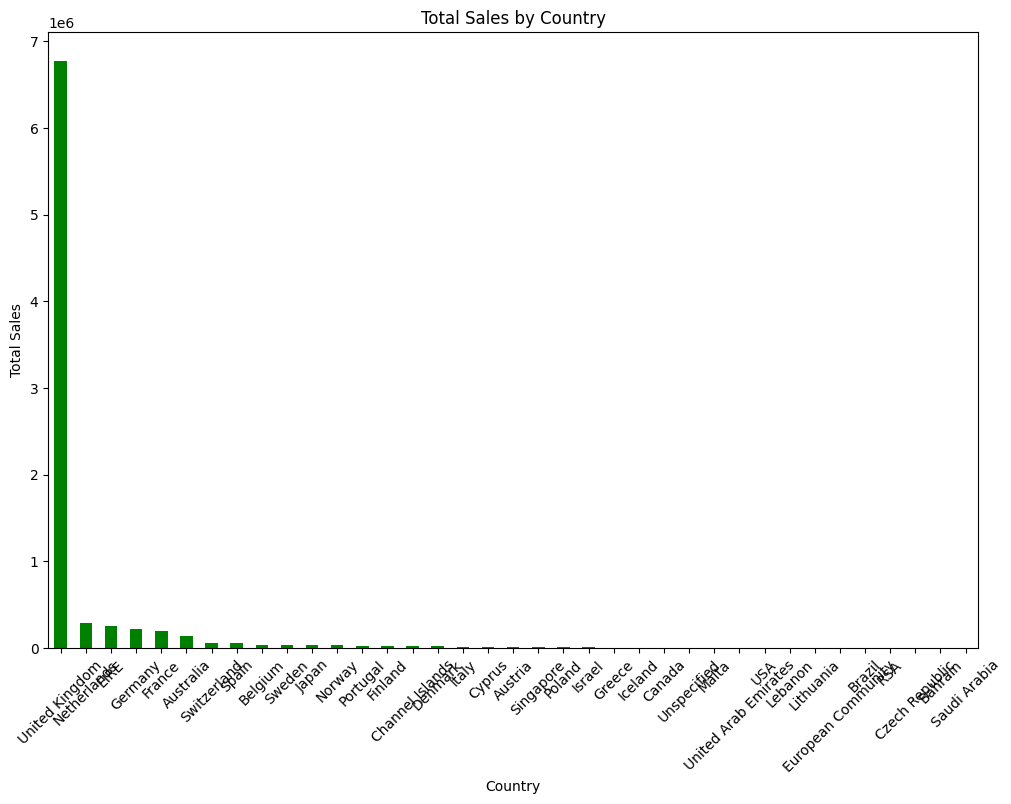

In [ ]:
# Total sales by country
country_sales = data.groupby('Country')['TotalAmount'].sum()

# Plot the total sales by country
country_sales.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='green')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# **Visualization**

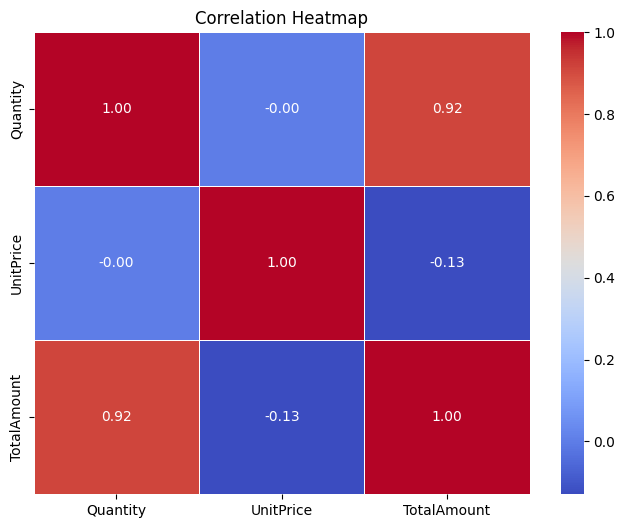

In [ ]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = data[['Quantity', 'UnitPrice', 'TotalAmount']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Recommendations**

In [ ]:

def generate_recommendations(data):
    recommendations = []

    # 1. Target regions (countries) with the highest total sales
    country_sales = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
    top_countries = country_sales.head(3)
    recommendations.append(f"Target the following countries for promotional efforts:\n {top_countries.index.tolist()}")

    # 2. Focus on high-selling product categories
    product_sales = data.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False)
    top_products = product_sales.head(3)
    recommendations.append(f"Focus on the following high-selling products:\n {top_products.index.tolist()}")

    # 3. Reward top-spending customers
    customer_spending = data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)
    top_customers = customer_spending.head(3)
    recommendations.append(f"Reward top-spending customers:\n {top_customers.index.tolist()}")

    # 4. Encourage purchases from low-frequency customers
    customer_purchase_frequency = data.groupby('CustomerID').size()
    low_frequency_customers = customer_purchase_frequency[customer_purchase_frequency == 1]
    recommendations.append(f"Target the following low-frequency customers for special promotions:\n {low_frequency_customers.index.tolist()}")

    # 5. Improve inventory management for top-selling products
    product_quantity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
    top_quantity_products = product_quantity.head(3)
    recommendations.append(f"Restock the following products based on high sales quantity:\n {top_quantity_products.index.tolist()}")

    return recommendations

# Example usage of the function
recommendations = generate_recommendations(data)
for rec in recommendations:
    print(f"\nRecommendation: {rec}")





Recommendation: Target the following countries for promotional efforts:
 ['United Kingdom', 'Netherlands', 'EIRE']

Recommendation: Focus on the following high-selling products:
 ['REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT']

Recommendation: Reward top-spending customers:
 [14646.0, 18102.0, 17450.0]

Recommendation: Target the following low-frequency customers for special promotions:
 [12503.0, 12505.0, 12943.0, 13017.0, 13099.0, 13120.0, 13135.0, 13154.0, 13185.0, 13256.0, 13270.0, 13302.0, 13307.0, 13366.0, 13391.0, 13703.0, 13747.0, 13829.0, 13841.0, 14090.0, 14119.0, 14351.0, 14424.0, 14576.0, 14679.0, 14705.0, 15070.0, 15118.0, 15195.0, 15313.0, 15316.0, 15369.0, 15389.0, 15510.0, 15524.0, 15562.0, 15590.0, 15657.0, 15668.0, 15753.0, 16061.0, 16078.0, 16093.0, 16138.0, 16144.0, 16148.0, 16323.0, 16428.0, 16579.0, 16737.0, 16738.0, 16765.0, 16881.0, 16953.0, 16990.0, 16995.0, 17065.0, 17102.0, 17291.0, 17307.0, 17331.0, 17347.0, 174